In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

#descargar set de gatos y perros
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete1X4ITG/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [1]:
import tensorflow_datasets as tfds

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

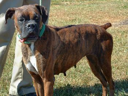
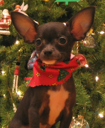
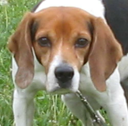
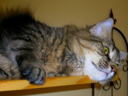
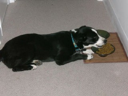

In [ ]:
#nos muestra 5 de las imagenesw que tomaos y laetiqueta
tfds.as_dataframe(datos['train'].take(5),metadatos)

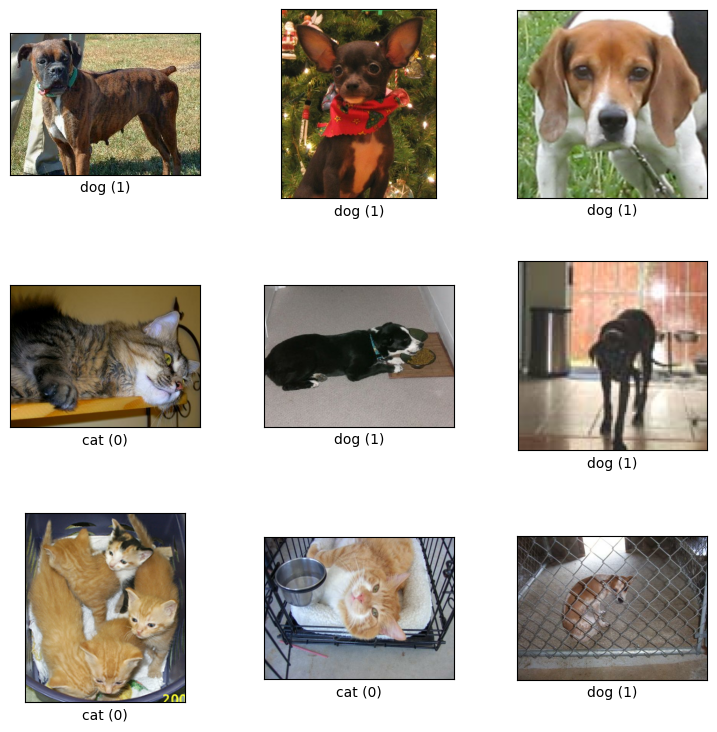

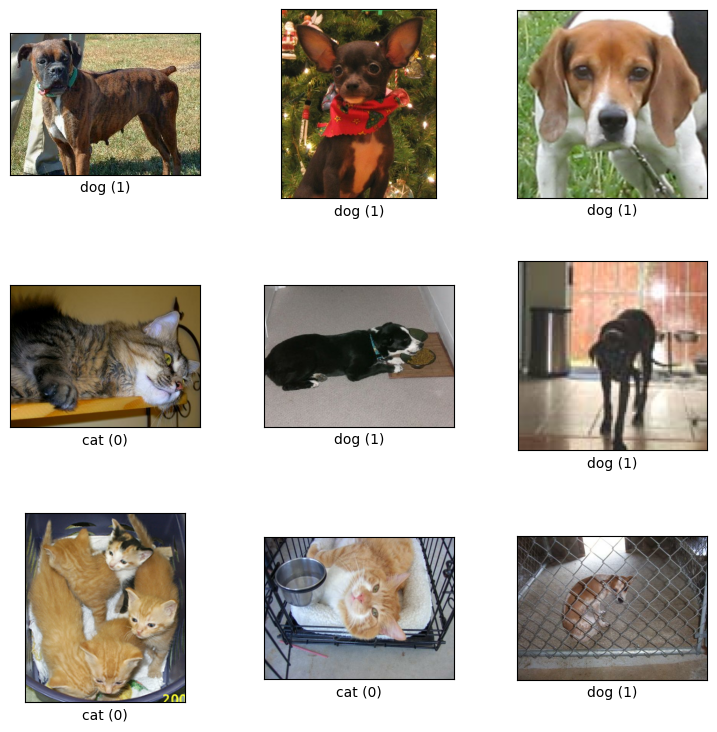

In [ ]:
tfds.show_examples(datos['train'],metadatos)#nos muestra los datos pero lindo

In [ ]:
import matplotlib.pyplot as plt
import cv2 #cambiar tama;o de iamgenes

plt.figure(figsize=(20, 20))#imagenes mas grandes

TAMANO_IMG=100 #entre mas grande mas va a demorarse el entrno

#iterarr los datos de las imagenes
for i, (imagen,etiquta) in enumerate(datos['train'].take(100)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  #cambair a blanco y negro (se ve verde pero hay qe agregar en el  plt.imshow(imagen))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(10, 10, i+1)#mostrar datos
  #quitar numeros
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
datos_entrenamiento = []
for i, (imagen, etiqueta) in enumerate(datos['train']): #todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  #cambair a blanco y negro (se ve verde pero hay qe agregar en el  plt.imshow(imagen))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)#cambia tama;no a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
X = [] #imagenes de entrada ([piXeles])
y = []#etiqewuta de eprro o gato]
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiquta)

In [ ]:
import numpy as np
X = np.array(X).astype(float) / 255
#en lugare de valores ente 0 y 255 vamos a ahcerlos entre 0 y 1
X
y = np.array(y) #convertlo a 1 o 0 (gato o perro)
X.shape#(numero de imgs,tama;o x,tam;o y, escala de grises)

(23262, 100, 100, 1)

In [ ]:
#entrenamiento
modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

modeloCNN2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
modeloDenso.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard ## ENTRENAMIENTO

#SE APRENDE LOS DATS DE MEMORIA Y NO ES TAN BUENO PERO FUNCIONA
"""tensorboardDenso = TensorBoard(log_dir='logs/denso')#creacarpetas
modeloDenso.fit(X,y,batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

tensorboardCNN = TensorBoard(log_dir='logs/denso')#creacarpetas
modeloCNN.fit(X,y,batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN])"""

tensorboardCNN2 = TensorBoard(log_dir='logs/denso')#creacarpetas
modeloCNN2.fit(X,y,batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

Epoch 1/100
618/618 [==============================] - 304s 489ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 2/100
618/618 [==============================] - 308s 499ms/step - loss: 1.0594e-28 - accuracy: 1.0000 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 3/100
618/618 [==============================] - 311s 503ms/step - loss: 3.6002e-29 - accuracy: 1.0000 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 4/100
618/618 [==============================] - 298s 481ms/step - loss: 6.8176e-29 - accuracy: 1.0000 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 5/100
618/618 [==============================] - 289s 468ms/step - loss: 7.4354e-29 - accuracy: 1.0000 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 6/100
618/618 [==============================] - 285s 462ms/step - loss: 6.0190e-29 - accuracy: 1.0000 - val_loss: 1.4665e-36 - val_accuracy: 1.0000
Epoch 7/100
618/618 [==============================] - 293s 474ms/step - l